Accuracy: 0.8310572349240448
ROC-AUC: 0.9005570938663069

Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.88      0.90      5322
        True       0.54      0.59      0.56      1195

    accuracy                           0.83      6517
   macro avg       0.72      0.74      0.73      6517
weighted avg       0.84      0.83      0.83      6517



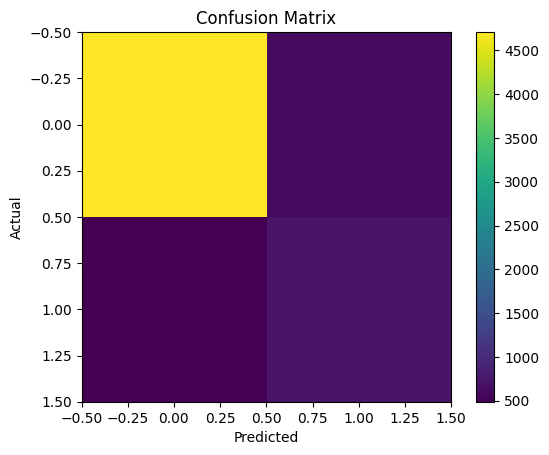

Credit Scoring Model COMPLETED SUCCESSFULLY


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

df = pd.read_csv("credit_risk_dataset.csv")

df.fillna(df.mean(numeric_only=True), inplace=True)

df = pd.get_dummies(df, drop_first=True)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Credit Scoring Model COMPLETED SUCCESSFULLY")